First few rows of the dataset:


,Email Text,Email Type
0,6 1100 disc uniformitarianism 1086 sex lang di...,Safe Email
1,side galicismos galicismo spanish term names i...,Safe Email
2,equistar deal tickets available assist robert ...,Safe Email
3,hot lil horny toy dream open minded person lov...,Phishing Email
4,software incredibly low prices 86 lower draper...,Phishing Email



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18097 entries, 0 to 18096
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Email Text  18097 non-null  object
 1   Email Type  18097 non-null  object
dtypes: object(2)
memory usage: 282.9+ KB

Summary Statistics:


,Email Text,Email Type
count,18097,18097
unique,17422,2
top,url date supplied,Safe Email
freq,10,11123



Missing Values:
Email Text    0
Email Type    0
dtype: int64

Number of phishing and non-phishing emails:
Email Type
Safe Email        11123
Phishing Email     6974
Name: count, dtype: int64


C:\Users\Hartl\AppData\Local\Temp\ipykernel_16184\47947247.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Email Type', data=df, palette='bright')


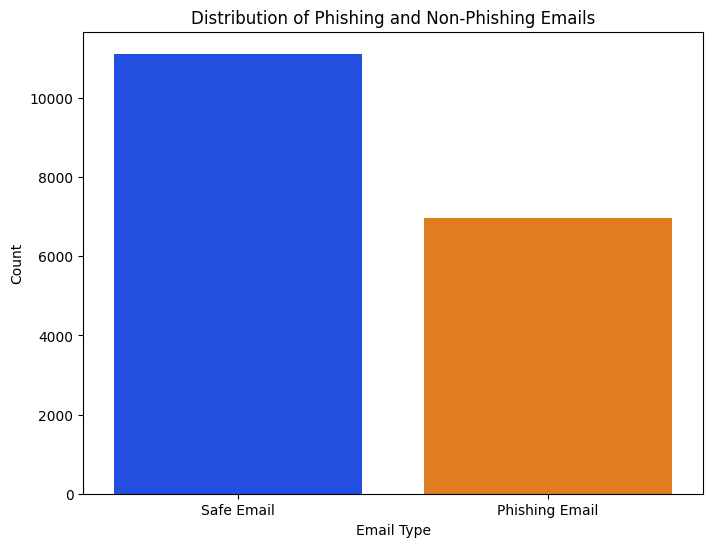


Number of columns in the dataset: 2

Column names:
['Email Text', 'Email Type']


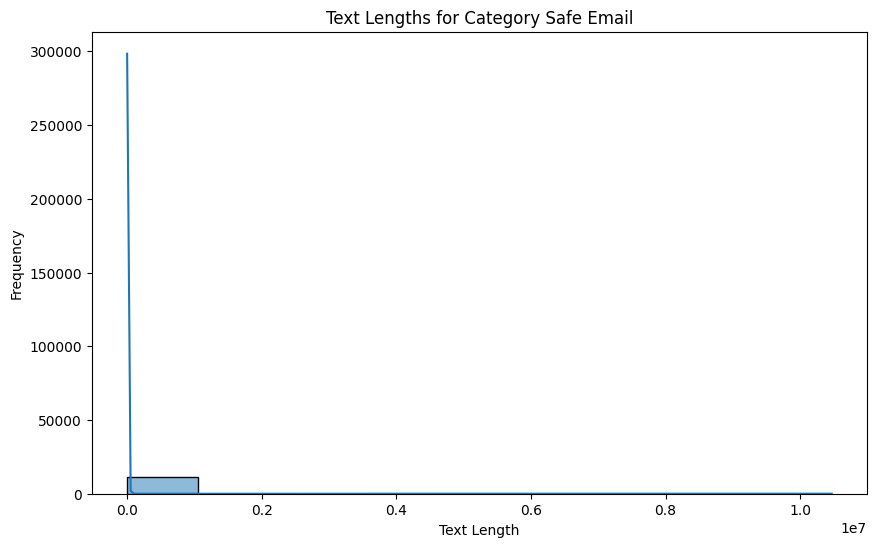

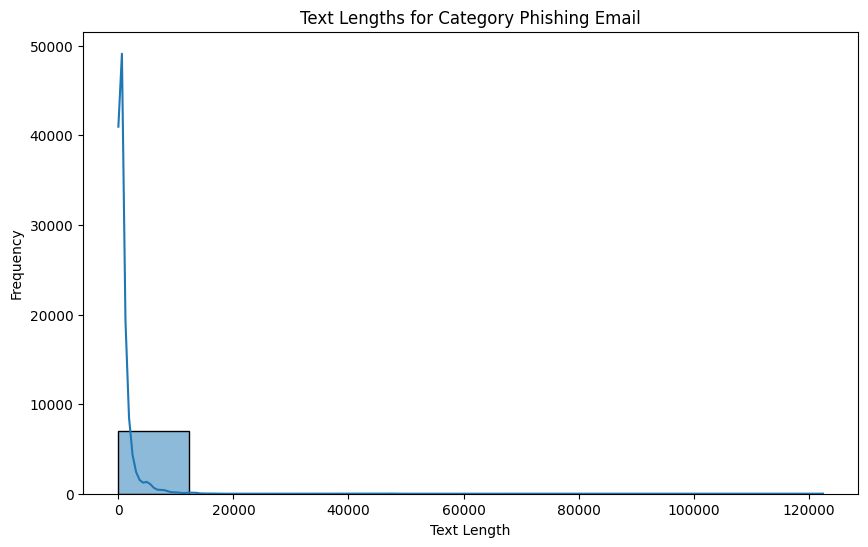

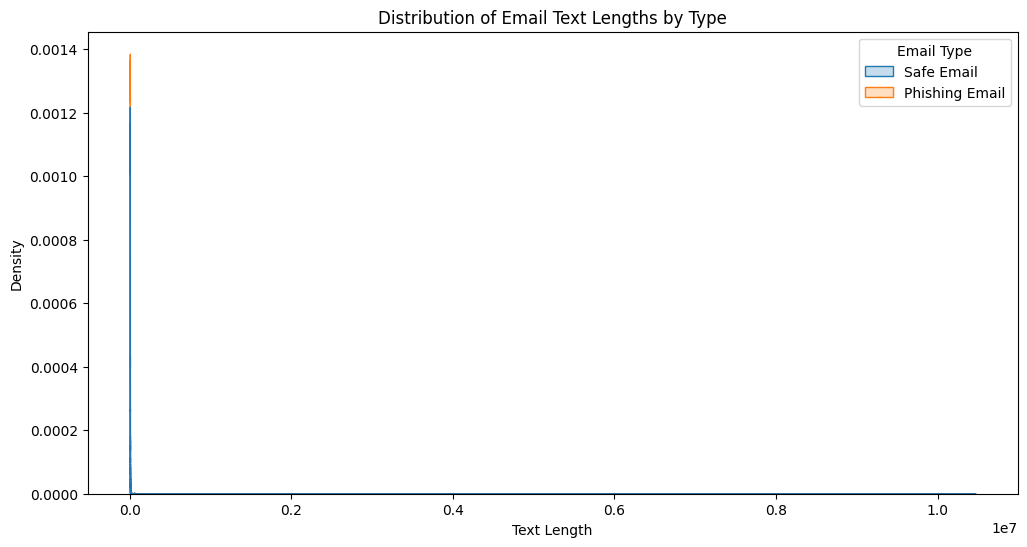

Email Type
Phishing Email    1026.659019
Safe Email        2151.411490
Name: text_length, dtype: float64
Email Type
Phishing Email    447.0
Safe Email        549.0
Name: text_length, dtype: float64
Email Type
Phishing Email    3
Safe Email        7
Name: text_length, dtype: int64
Email Type
Phishing Email      122481
Safe Email        10467367
Name: text_length, dtype: int64


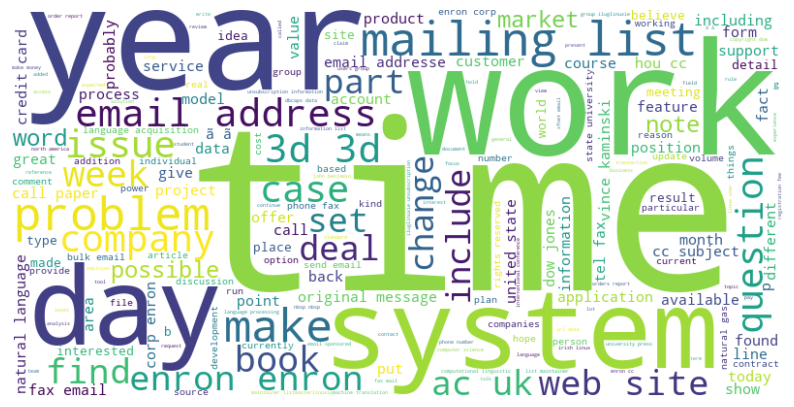

In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Load the dataset
df = pd.read_csv('../data/processed/all_emails.csv')

# Display the first few rows of the dataframe
print("First few rows of the dataset:")
display(df.head())

# Display basic information about the dataframe
print("\nDataset Info:")
df.info()

# Display summary statistics
print("\nSummary Statistics:")
display(df.describe())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Count the number of phishing and non-phishing emails
phishing_counts = df['Email Type'].value_counts()
print("\nNumber of phishing and non-phishing emails:")
print(phishing_counts)

# Visualize the distribution of phishing and non-phishing emails
plt.figure(figsize=(8, 6))
sns.countplot(x='Email Type', data=df, palette='bright')
plt.title('Distribution of Phishing and Non-Phishing Emails')
plt.xlabel('Email Type')
plt.ylabel('Count')
plt.show()

# Display the number of columns
num_columns = len(df.columns)
print(f"\nNumber of columns in the dataset: {num_columns}")

# Display the column names
print("\nColumn names:")
print(df.columns.tolist())

df['Email Text'] = df['Email Text'].astype(str).fillna('')
# Calculate text lengths
df['text_length'] = df['Email Text'].apply(len)

# Extract unique categories
categories = df['Email Type'].unique()

# Create a plot for each category
for category in categories:
    plt.figure(figsize=(10, 6))
    subset = df[df['Email Type'] == category]
    sns.histplot(subset['text_length'], kde=True, bins=10)
    plt.title(f'Text Lengths for Category {category}')
    plt.xlabel('Text Length')
    plt.ylabel('Frequency')
    plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='text_length', hue='Email Type', element='step', stat='density', common_norm=False)
plt.title('Distribution of Email Text Lengths by Type')
plt.xlabel('Text Length')
plt.ylabel('Density')
plt.show()

average_lengths = df.groupby('Email Type')['text_length'].mean()
median_length = df.groupby('Email Type')['text_length'].median()
min_length = df.groupby('Email Type')['text_length'].min()
max_length = df.groupby('Email Type')['text_length'].max()
print(average_lengths)
print(median_length)
print(min_length)
print(max_length)

# Combine all the text data into a single string
text = " ".join(df['Email Text'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Visualize the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()